Getting toy dataset:
- from sklearn.datasets import ... (ex. make_circles / make_blobs)

Create train test split:
- from sklearn.model_selection import train_test_split

Display some images in the data exploration process:

>fig = plt.figure(figsize = (9, 9))  
rows, cols = 4, 4  
for i in range(1, rows*cols+1):  
    >>random_idx = torch.randint(0, len(train_data), size = (1,)).item()  
    img, label = train_data[random_idx]  
    fig.add_subplot(rows, cols, i)  
    plt.imshow(img.squeeze())  
    plt.title(class_names[label])  
    plt.axis(False)




### Random Questions & Points

1. Difference between torch.Tensor & torch.tensor?
- torch.tensor infers the dtype automatically, torch.Tensor returns a torch.FloatTensor, stick with torch.tensor

2. When plugging numbers into neuralnets we want them to be floating point numbers

3. tensor.grad: After calling .backward() on a tensor that is part of the computation graph, the grad attribute will contain the gradient of the loss with respect to that tensor

### Key concepts
### KL divergence: measures distance between probability distributions

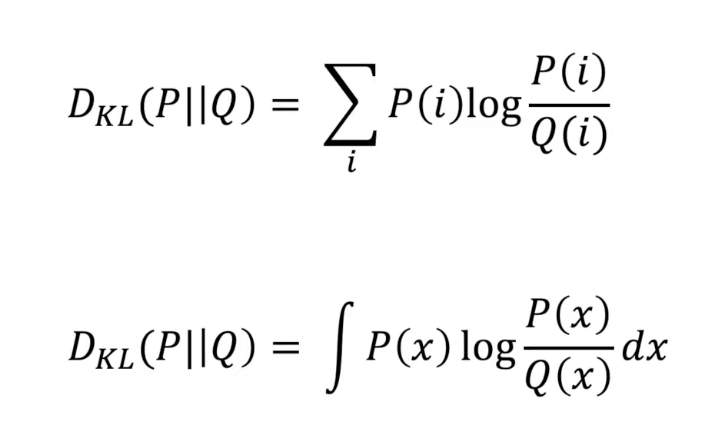

top one for discrete prob distributions, bottom for continuous

Intuition: 
* the natural meansurement of distance between probability distributions can be seen as how likely the second distribution can generate samples from the first distribution

(Cross Entropy Loss == KL Loss) so minimizing cross entropy, we're minimizing distance between distributions

Distance between distributions: seeing if the distributions assign similar probabilities to the same output sequences, if similar then distributions are similar too

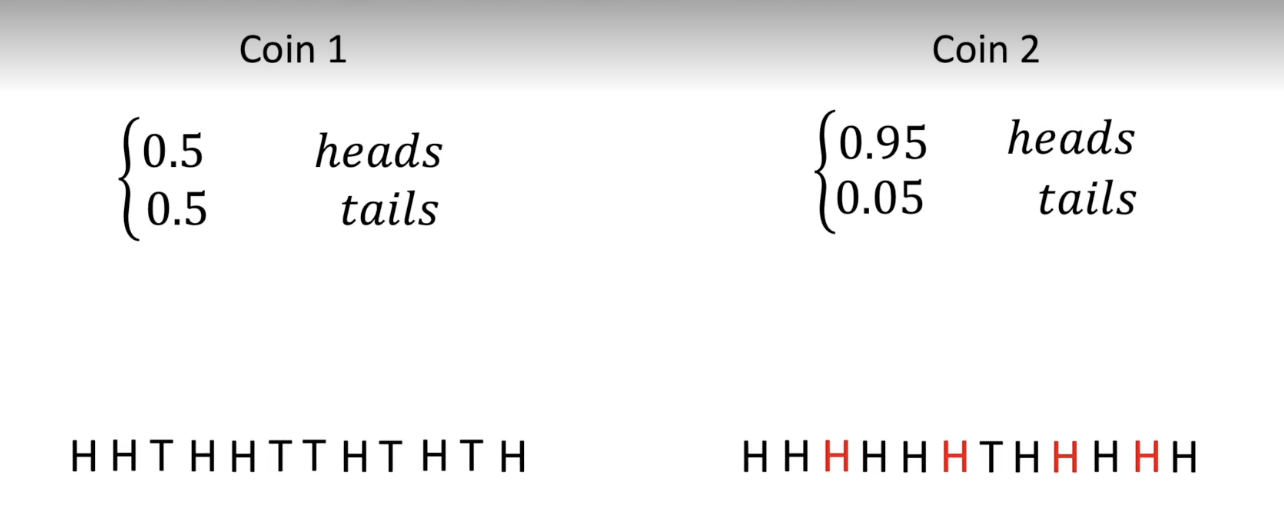
Algorithm: 

1. Generate observations using coin 1
2. Calculate the probability of coin 2 generating the above observations
3. Compare the two probabilities (similar probabilities means similar distributions)

So we calculate:

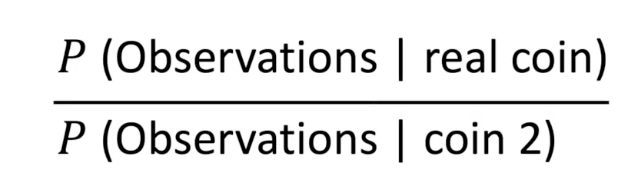

Assume we have p1, p2 for true coin, q1, q2 for coin 2

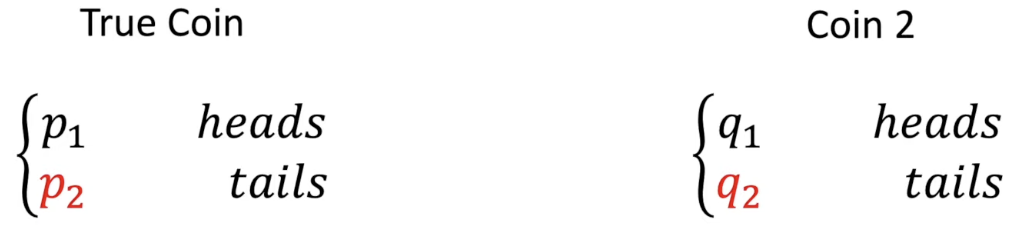

So the probability of the same observation for the two coins:

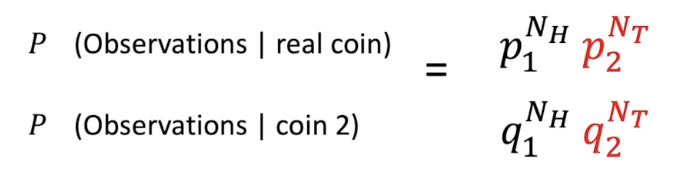

Now we find the ratio of the two likelihoods:

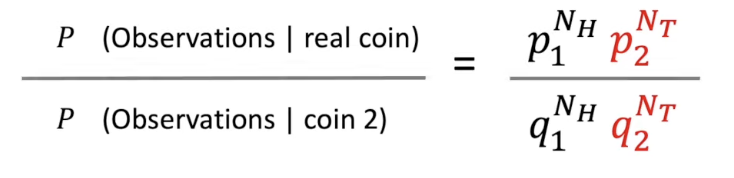

The KL divergence measures the same thing, just with some further normalization steps that made it look different from the above formula, details of normalization shown below:

1. Normal with sample size by raising the prob ratio with a power of 1/N (N is num of samples):

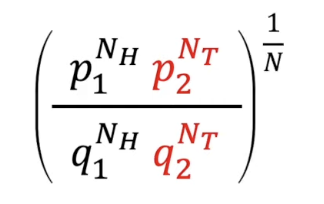

2. Then take the log of the whole thing:

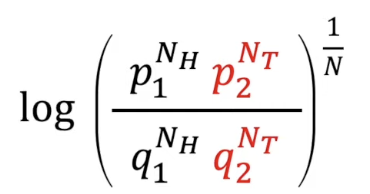

3. Then do the log rule and simplify:

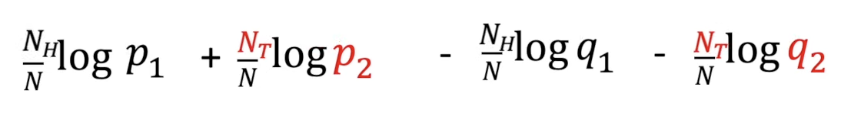

4. as N ->$\infty$, $\frac{N_H}{N} = P1$, $\frac{N_T}{N} = P2$, we reach the final expression:

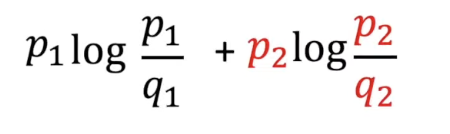

The normalized log prob of the true likelihood / the likelihood of the second distribution, THE SAME AS KL divergence in the first screenshot, the coin flip example is discrete so continuous is just the integral, coin has two classes but we can have more, so KL is generalized to have i terms.

KL divergence: 

- A natural measurement of distance between probability distributions motivated by looking at how likely the second distribution will be able to generate samples from the first distribution
- Used in deep learning, KL divergence == Cross Entropy Loss






### Negative Log-Likelihood (NLL)

- NLL is a specific type of loss function used in classification tasks.
- It measures how well the predicted probability distribution matches the true class labels

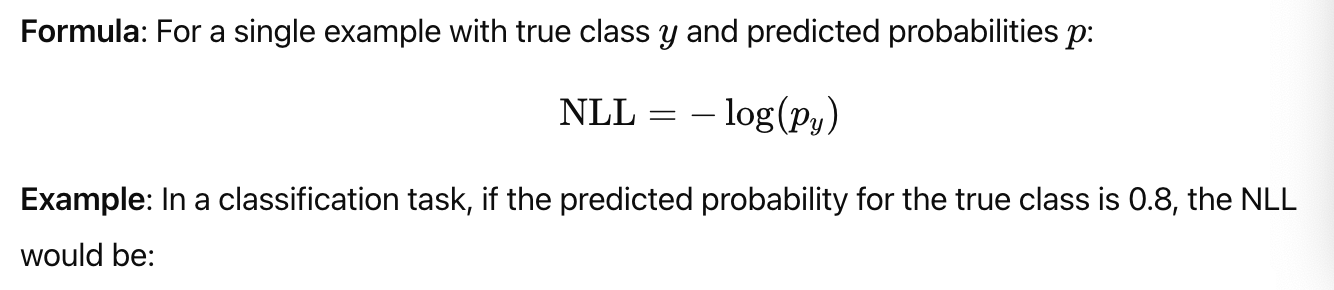

Difference between KL and Negative log likelihood:

- NLL: Focuses on the probability of the true class in a classification context. It is typically used as a loss function in supervised learning.
- KL Divergence: Measures the overall difference between two distributions. It is often used in unsupervised or semi-supervised learning, where comparing entire distributions is necessary.
- NLL is loss function comparing 2 elements, KL for comparing the entire distribution

NLL example:

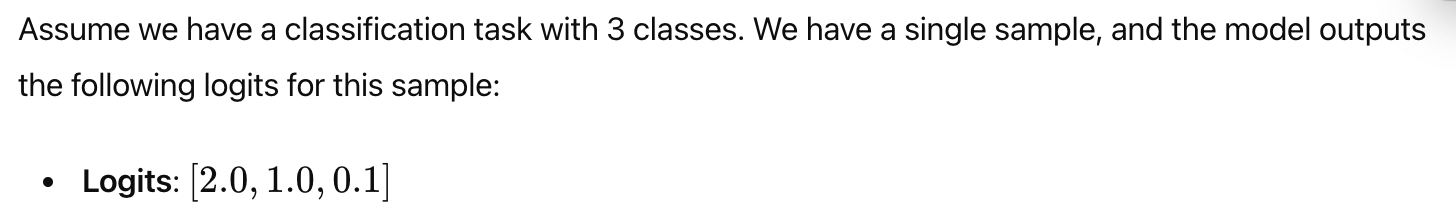

Assume the true class label for this sample is class 0.

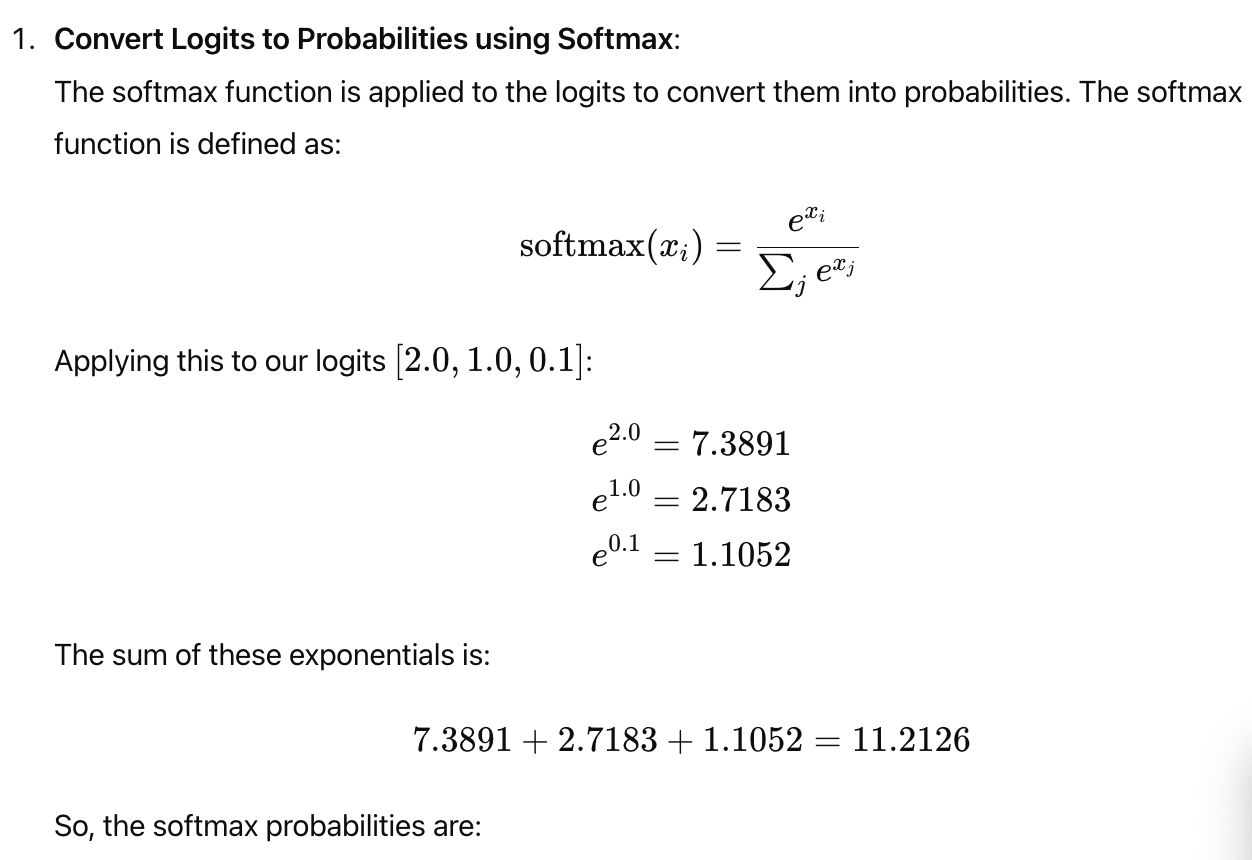

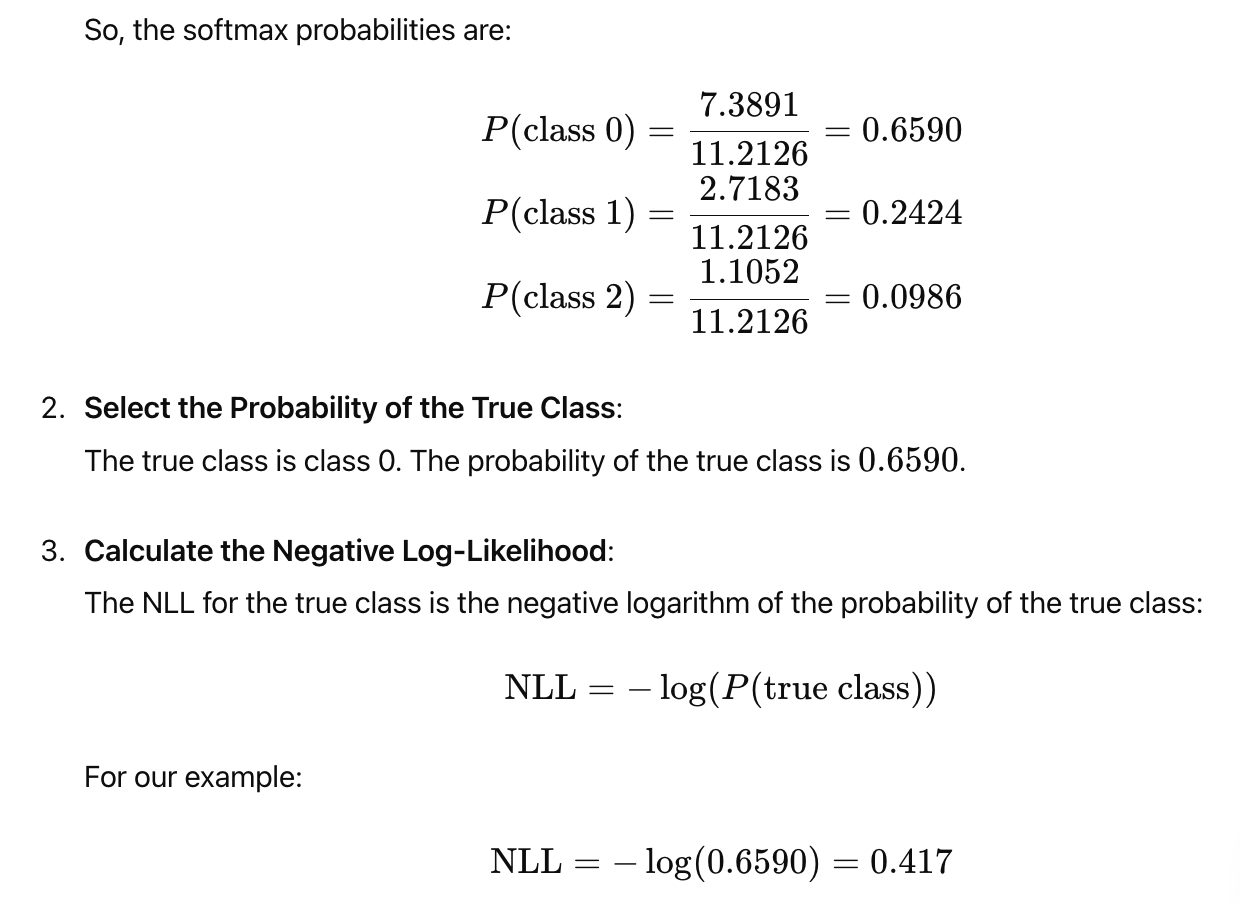

Logits ----(through softmax)---> probabilities ---(select true probability)---> num ---> do the negative log of num